<h1 align='center'>Time Series Analysis of Sales Data</h1>

In this section, I will explore different methodology to analyze time series records. I will also introduce a wonderful python module `statsmodels` that we can use to analyse the data more effectively.

## Contents

- Introduction to statsmodels
- Time Series Decomposition
- Exponentially weighted moving average
- Holt Winter methods

I will also put some maths behind each method for better understanding.

Let's get started!

## Introduction to statsmodels

Statsmodels is python module that provides classes and functions for estimation of many different statistical models, as well as for conducting statistical tests and statistical data exploration. 

Let's see statsmodels functionalities on a real data.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Load the data

In [2]:
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)

### Plot

In [4]:
df.shape

(9994, 20)

In [6]:
#plot the sales data of furniture
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940


In [7]:
#resample the data on Monthly level
df = df.resample('MS').sum()

df.head(4)

,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837


[Text(0, 0.5, 'Total Monthly Sales of Furniture')]

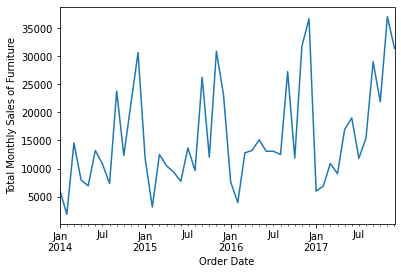

In [9]:
ax = df['Sales'].plot()
ax.autoscale(axis='x', tight=True)
ax.set(ylabel='Total Monthly Sales of Furniture')

## Trend calculation

We can use functionalitis of statsmodels to get the trend value from a time series data.

Here we can use <tt>statsmodels.tsa.filters.hp_filter.hpfilter(X, lamb=1600)</tt> the `Hodrick Prescott` filter. It filter out time series $y_t$ into a trend component $\tau_t$ and a cyclical component $c_t$.



In [11]:
from statsmodels.tsa.filters.hp_filter import hpfilter

#get the values
sales_cycle, sales_trend = hpfilter(df['Sales'], lamb=1200)


In [12]:
sales_cycle

Order Date
2014-01-01    -2237.785515
2014-02-01    -7194.116597
2014-03-01     4988.582143
2014-04-01    -2182.411378
2014-05-01    -3742.908393
2014-06-01     2040.932142
2014-07-01     -826.051041
2014-08-01    -4774.134886
2014-09-01    11316.777440
2014-10-01     -546.914385
2014-11-01     8418.193169
2014-12-01    17262.340394
2015-01-01    -1826.442980
2015-02-01   -10579.349704
2015-03-01    -1343.107196
2015-04-01    -3486.616147
2015-05-01    -4704.357894
2015-06-01    -6484.098258
2015-07-01     -645.286765
2015-08-01    -4800.086824
2015-09-01    11723.284596
2015-10-01    -2616.805703
2015-11-01    16160.767377
2015-12-01     8308.040006
2016-01-01    -7205.428753
2016-02-01   -10964.215502
2016-03-01    -2173.990620
2016-04-01    -1875.412441
2016-05-01     -108.761638
2016-06-01    -2327.801041
2016-07-01    -2528.229846
2016-08-01    -3338.469115
2016-09-01    11193.779650
2016-10-01    -4459.459797
2016-11-01    15170.704149
2016-12-01    19768.249808
2017-01-01   -112

In [13]:
type(sales_cycle)

pandas.core.series.Series

In [14]:
sales_trend

Order Date
2014-01-01     8480.310515
2014-02-01     9033.774597
2014-03-01     9585.373857
2014-04-01    10127.248378
2014-05-01    10655.695393
2014-06-01    11165.193458
2014-07-01    11647.102041
2014-08-01    12094.481386
2014-09-01    12499.703360
2014-10-01    12851.161385
2014-11-01    13146.679531
2014-12-01    13383.626106
2015-01-01    13566.384580
2015-02-01    13713.723704
2015-03-01    13842.890196
2015-04-01    13962.314647
2015-05-01    14079.308394
2015-06-01    14198.277258
2015-07-01    14319.706765
2015-08-01    14438.679024
2015-09-01    14549.738404
2015-10-01    14643.429203
2015-11-01    14720.065123
2015-12-01    14777.779194
2016-01-01    14828.171753
2016-02-01    14889.766502
2016-03-01    14975.082620
2016-04-01    15087.502441
2016-05-01    15228.596638
2016-06-01    15398.373041
2016-07-01    15596.748846
2016-08-01    15821.701415
2016-09-01    16069.101250
2016-10-01    16332.036797
2016-11-01    16612.924651
2016-12-01    16910.465192
2017-01-01    172

Trend seems monotonically increasing from `2014-01-01` to `2017-12-01`

Append the trend value in additiona columns

In [15]:
df['Trend'] = sales_trend

In [16]:
df.head(4)

,Sales,Trend
Order Date,,
2014-01-01,6242.525,8480.310515
2014-02-01,1839.658,9033.774597
2014-03-01,14573.956,9585.373857
2014-04-01,7944.837,10127.248378


#### Plot the trend

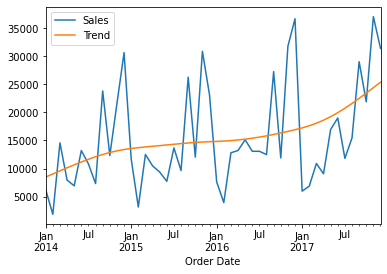

In [17]:
df[['Sales', 'Trend']].plot().autoscale(axis='x', tight=True)

#### Plot the cyclic values

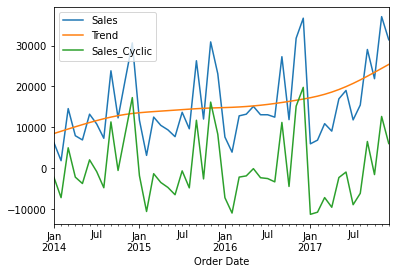

In [18]:
df['Sales_Cyclic'] = sales_cycle

df[['Sales', 'Trend', 'Sales_Cyclic']].plot().autoscale(axis='x', tight=True)

From the graph it is evident that the original series is summation of trend component and the cyclic component.

## Time Series Decomposition

The decomposition of a time series attempts to isolate individual components from the original series.

    - Trend
    - Seasonality
    - Error/Noise

These values let us see quickly and visually what each component contributes to overall behaviour.

**Model types:**

    - Additive model - It is more appropriate when it seems that the trend is more linear and the seasonality and trend components seems to be constant over time(e.g each easr we add 1000 additional customers)
    - Multiplicative model - It seems more appropriate when we are increasing(or decreasing) at a non-linear rate(e.g. each year we triple sales data)

Let up apply the above methods to our furniture sales data.

In [19]:
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df = df.resample('MS').sum()
df.head(4)

,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837


<Axes: xlabel='Order Date'>

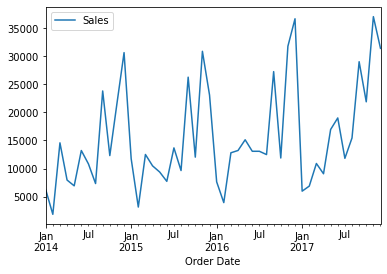

In [22]:
df.plot()

From above chart it seems the trend is somewhat constant so we can use `additive` model here. 

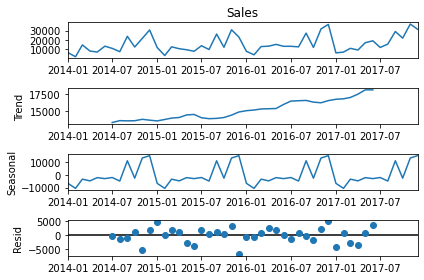

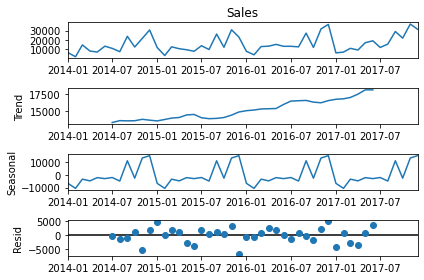

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Sales'], model='additive')

result.plot()

We have decomposed out sales series into three components `Trend`, `Seasonal` and `Residual`. 

## Moving average and Exponentially moving avearge

In this section we will talk about Moving avearge and exponentially weighted moving average in terms of complexity and performance. 

In Pandas we have:
- pandas.DataFrame.rolling(window) - Provides rolling window calculations
- pandas.DataFrame.ewm(span) - Provides exponential weighted functions

### Imports

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Data Loader

In [24]:
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df = df.resample('MS').sum()
df.head(4)

,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837


### Simple Moving Average(SMA)

Let's calculate the moving average of sales for quaterly(3 months span) and half yearly.

In [26]:
#append quaterly MA and half yearly MA
df['3-month-SMA'] = df['Sales'].rolling(window=3).mean()

df['6-month-SMA'] = df['Sales'].rolling(window=6).mean()

df.head(10)


,Sales,3-month-SMA,6-month-SMA
Order Date,,,
2014-01-01,6242.5250,NaN,NaN
2014-02-01,1839.6580,NaN,NaN
2014-03-01,14573.9560,7552.046333,NaN
2014-04-01,7944.8370,8119.483667,NaN
2014-05-01,6912.7870,9810.526667,NaN
2014-06-01,13206.1256,9354.583200,8453.314767
2014-07-01,10821.0510,10313.321200,9216.402433
2014-08-01,7320.3465,10449.174367,10129.850517
2014-09-01,23816.4808,13985.959433,11670.271317


<Axes: xlabel='Order Date'>

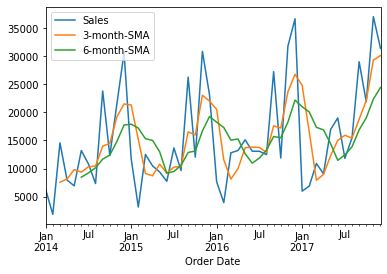

In [27]:
df.plot()

### Issues with SMA

- Samller window may lead to more noise and less signal
- It will always lag by the size of the window
- It never gonna reach the peak or valley of the data due to averaging.
- Extreme historical values can skew the SMA significantly.

### Exponentially weighted moving avearge(EWMA)

It allows to reduce the lag effect from SMA and it will put more weight on values that occured more recently. It does apply more weight on values that occured more recently. The amount of weight applied to the most recent values will depend on actual parameters used in EWMA and the number of periods given a window size.



In [39]:
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df = df.resample('MS').sum()
df.head(4)

,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837


In [40]:
#append ewma for span of three months
df['3-span-EWMA'] = df['Sales'].ewm(span=12, adjust=False).mean()


<Axes: xlabel='Order Date'>

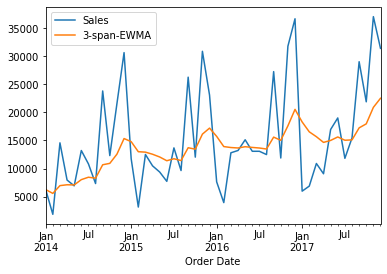

In [41]:
df.plot()

### Compare SMA and EWMA

<Axes: xlabel='Order Date'>

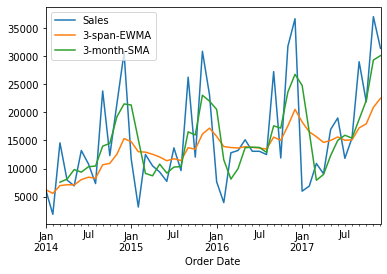

In [42]:
#append SMA with window size of 3
df['3-month-SMA'] = df['Sales'].rolling(window=3).mean()

df.plot()

Note than **Simple exponential smoothing** technique does a poor job of forecasting when there is a trend in the data as seen above.

## Holt-Winters Methods

In the above section we use Simple Exponential Smoothing using just one smoothing factor $\alpha$(alpha). But that did not do well on accounting other factors like trend and seasonality.

**Contents**

- Simple exponentially smoothing
- Double exponential smoothing(Holt's method)
- Triple exponential smoothing(Holt-Winters methods)


#### Imports

In [44]:
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df = df.resample('MS').sum()
df.head(4)

,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837


In [45]:
df.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Order Date', freq='MS')

Note that inorder to build a Holt-Winter smoothing model, statsmodels needs to know the frequency of the data whether it's daily, monthly etc. We have already resampled the original data into start of each month(MS).

In [46]:
df.index.freq

<MonthBegin>

### Simple Exponential Smoothing

A variatiob of the statsmodels Holt-Winters function provides Simple Exponential Smoothing.

### Double Exponential Smoothing (Holt's Method)

### Triple Exponential Smoothing